In [1]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
database_name = 'telecom'
table_name = 'xdr_data'

In [79]:
connection_params = {'host': 'localhost', 'user': 'postgres',
                         'password': 'Postgresql', 'port': "5432",
                         'database': database_name }

engine = create_engine(f"postgresql+psycopg2://{connection_params['user']}:{connection_params['password']}@{connection_params['host']}:{connection_params['port']}/{connection_params['database']}")


In [80]:

# str or SQLAlchemy Select table (select or text object)
sql_query = 'SELECT * FROM xdr_data'

df = pd.read_sql(sql_query, con= engine)

In [81]:
df.shape

(150001, 55)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

#### Task 2 - User overview analysis
For the actual telecom dataset, you‘re expected to conduct a full User Overview analysis & the following sub-tasks are your guidance: 
- Start by identifying the top 10 handsets used by the customers.
- Then, identify the top 3 handset manufacturers
- Next, identify the top 5 handsets per top 3 handset manufacturer
- Make a short interpretation and recommendation to marketing teams


In [83]:
def top_10_handsets(data):
    data['Handset Type'].value_counts()[:10].plot.bar(figsize=(10, 5))
    plt.title(f'Top 10 Handsets used by the customers', size=15, fontweight='bold')
    plt.xlabel("Handsets Type", size=18); plt.ylabel("Usage Frequency", size=14);
    plt.xticks(size=12); plt.yticks(size=12);
    plt.show()

def top_3_manufacturers(data):
    data['Handset Manufacturer'].value_counts()[:3].plot.bar()
    plt.title(f'Top 3 Handset Manufacturers', fontweight= 'bold')
    plt.xlabel("Handset Manufacturers"); 
    plt.ylabel("Frequency");
    plt.show()

#### Top 3 Handset Manufacturers

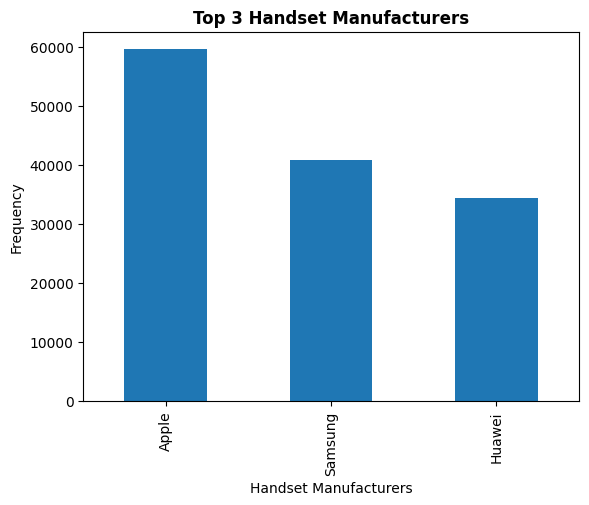

In [84]:
top_3_manufacturers(df)

#### Top 10 Handsets used by customers

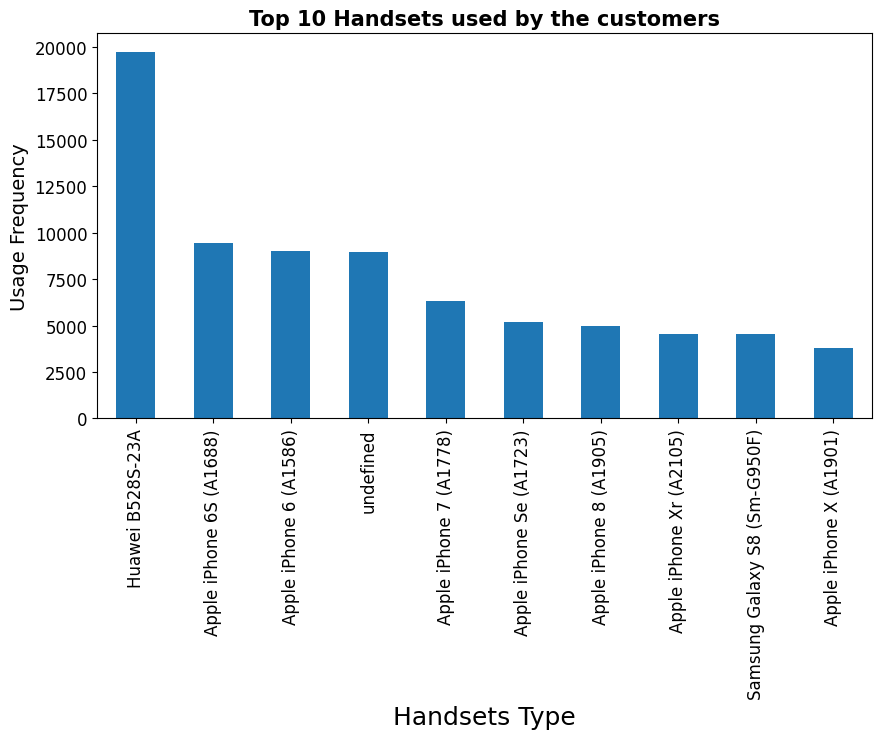

In [85]:
top_10_handsets(df)

#### The top 5 handsets per top 3 handset manufacturer

In [86]:
A = df.groupby(['Handset Manufacturer', 'Handset Type'])['Handset Type'].count().reset_index(name='Count')
C = A["Handset Type"].value_counts().rank(ascending = False)
D = df.groupby(['Handset Manufacturer'])['Handset Type'].value_counts().rank(ascending=False).reset_index(name='Count')
D

,Handset Manufacturer,Handset Type,Count
0,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot X18 Plus,745.5
1,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot A5,1113.5
2,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot Note S,1113.5
3,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot Nova,1113.5
4,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot Power,1113.5
...,...,...,...
1391,Zte,Zte Blade V8 Blade V8,1113.5
1392,ZyXEL Communications Corp,Zyxel Communicat. Zyxel Wah7706,1113.5
1393,Zyxel Communications Corp,Zyxel Communicat. Sbg3600,1113.5
1394,Zyxel Communications Corp,Zyxel Communicat. Lte7460,1113.5


Task 2.1 - Your employer wants to have an overview of the users’ behaviour on those applications.   
- Aggregate per user the following information in the column  
  - number of xDR sessions
  - Session duration
  - the total download (DL) and upload (UL) data
  - the total data volume (in Bytes) during this session for each application


In [87]:
df.groupby(df['MSISDN/Number'])[['Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)']].sum()

,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
MSISDN/Number,,,,,,,,,,,,,,,,,
3.360100e+10,116720.0,8.426375e+08,36053108.0,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.0,14900201.0,6724347.0,10265105.0,16915876.0,8.110911e+08,1367528.0,377096990.0,9473882.0
3.360100e+10,181230.0,1.207552e+08,36104459.0,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.0,5324251.0,7107972.0,770569.0,10451194.0,1.050353e+08,14714780.0,279557701.0,2152370.0
3.360100e+10,134969.0,5.566597e+08,39306820.0,3148004.0,47619.0,3343483.0,99643.0,2436500.0,768880.0,2137272.0,19196298.0,16525919.0,2827981.0,5.290685e+08,9759228.0,495086501.0,6607171.0
3.360101e+10,49878.0,4.019932e+08,20327526.0,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.0,4393123.0,2584198.0,1157362.0,784730.0,3.880748e+08,3051292.0,25248001.0,10031701.0
3.360101e+10,37104.0,1.363130e+09,94280527.0,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,1057661.0,10339971.0,31193031.0,24971647.0,24230077.0,1.308981e+09,5816727.0,777643713.0,27160771.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.379000e+10,8810.0,6.879252e+08,26716429.0,234320.0,65863.0,6834178.0,697091.0,480946.0,525969.0,8294310.0,18353533.0,14754741.0,147797.0,6.573267e+08,3034642.0,291391283.0,3891534.0
3.379000e+10,140988.0,4.445751e+08,35732243.0,442214.0,56355.0,1472406.0,3957299.0,2513433.0,664.0,5596862.0,14254710.0,6929961.0,1601099.0,4.276202e+08,9383076.0,204636073.0,6479040.0
3.197021e+12,877385.0,1.948281e+08,37295915.0,668596.0,46628.0,8572779.0,1865881.0,842279.0,678492.0,9839889.0,2120016.0,10340908.0,16251392.0,1.645636e+08,13485133.0,467678100.0,2848373.0


### Task 2-2
#### Statistical Description of the data 

In [88]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


Let's create a duration in seconds

In [89]:
df['Dur. (s)'] = df['Dur. (ms)'] / 1000
df['Dur. (s)'].describe()

count    150000.000000
mean        104.608560
std          81.037621
min           7.142000
25%          57.440500
50%          86.399000
75%         132.430250
max        1859.336000
Name: Dur. (s), dtype: float64

On average Customer used the network (uploading or downloading) for `105 sec` with a dispersion of `81 sec`. the highest duration a customer spent on the network is `1859 sec`. And the mininum time a customer spent on the network is `7 sec`

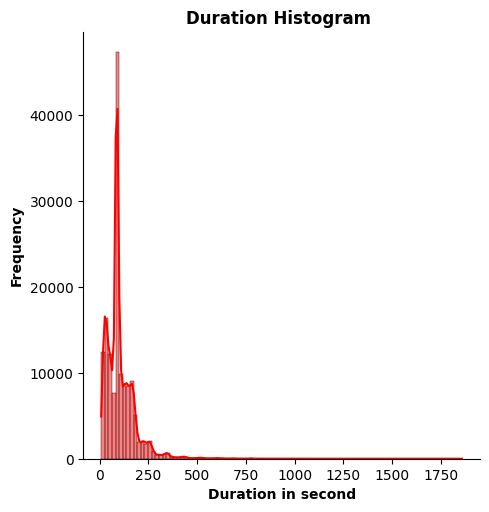

In [90]:
# Duration

sns.displot(df['Dur. (s)'], kde = True, color = 'red', bins =100)
plt.title("Duration Histogram ", fontweight='bold')
plt.xlabel('Duration in second', fontweight= 'bold')
plt.ylabel('Frequency', fontweight='bold')

plt.show()

####

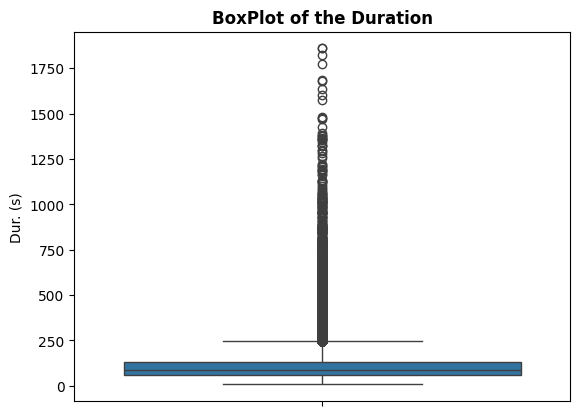

In [91]:
sns.boxplot(df['Dur. (s)'])
plt.title("BoxPlot of the Duration", fontweight='bold')
plt.show()

#### Univariate Analysis on Data Volume

In [92]:
df[['Total UL (MB)', 'Total DL (MB)']] = df[['Total UL (Bytes)', 'Total DL (Bytes)']] / 1024 / 1024

df[['Total UL (MB)', 'Total DL (MB)']].describe()

,Total UL (MB),Total DL (MB)
count,150000.000000,150000.000000
mean,39.216238,433.581762
std,10.754000,232.832789
min,2.734081,6.784478
25%,31.682978,231.844714
50%,39.237320,434.723928
75%,46.762694,634.866280
max,74.702559,861.138931


<Figure size 1000x500 with 0 Axes>

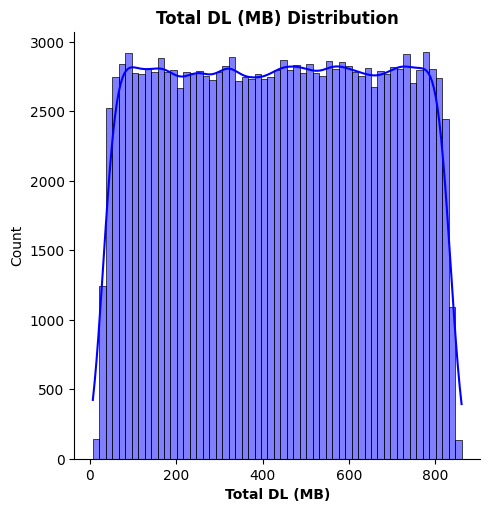

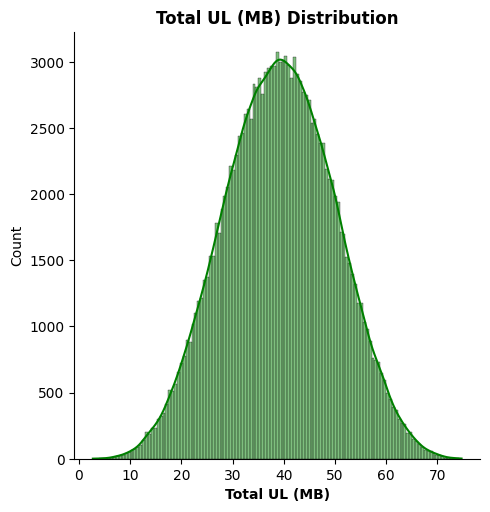

In [93]:
plt.figure(figsize=(10,5))

#plt.hist(df["Total DL (MB)"], color = 'lightgreen', ec= 'black' , bins =50)
sns.displot(df['Total DL (MB)'], kde = True, color = 'blue')
plt.title("Total DL (MB) Distribution", fontweight= 'bold')
plt.xlabel("Total DL (MB)", fontweight= 'bold')
plt.show()

sns.displot(df['Total UL (MB)'], kde = True, color = 'green')
plt.title("Total UL (MB) Distribution", fontweight= 'bold')
plt.xlabel("Total UL (MB)", fontweight= 'bold')
plt.show()


#### Bivariate Analysis

<Axes: >

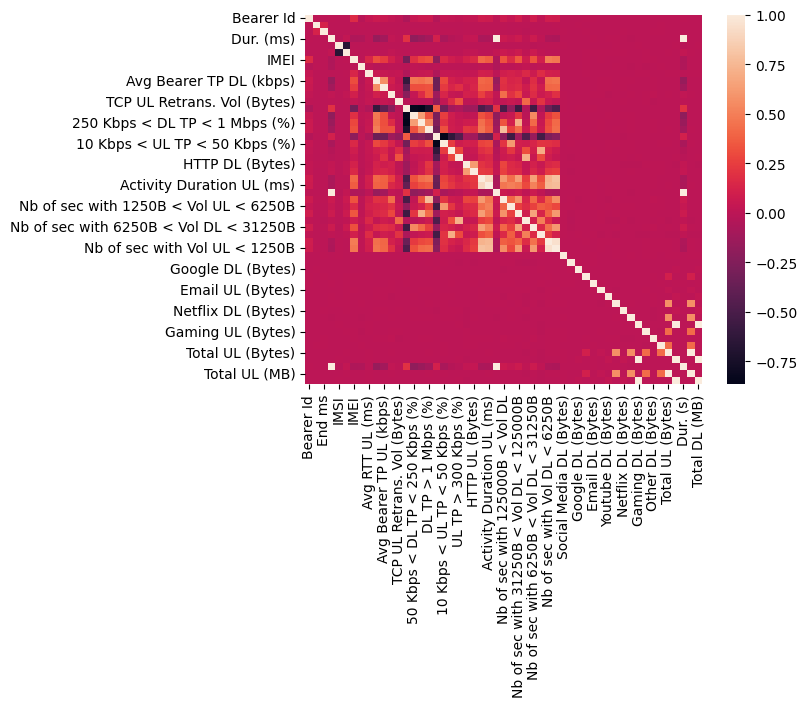

In [94]:
# numeric features
df_num = df.select_dtypes(exclude='object')
mat = df_num.corr()
sns.heatmap(mat)

There is a strong positive correlation between Duration and Total Volume of data.
Furthermore, there is a position relationship between:
- Google DL (Bytes) and Social Media DL (Bytes)
- Email UL (Bytes) and Email DL (Bytes)
- Gaming UL (Bytes) and Gaming UL (Bytes)


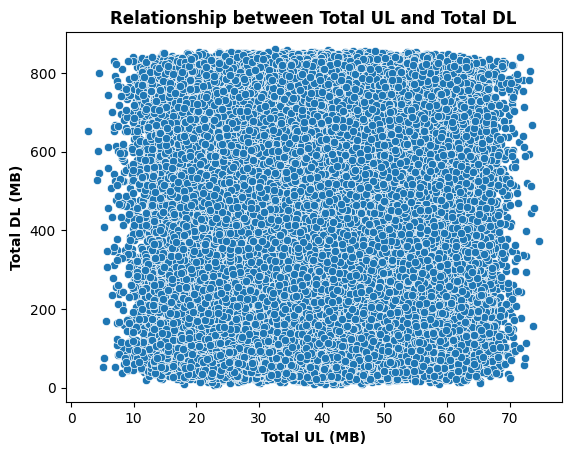

In [95]:
sns.scatterplot(data = df, x= df["Total UL (MB)"], y= df["Total DL (MB)"])
plt.title("Relationship between Total UL and Total DL", fontweight ='bold')
plt.xlabel("Total UL (MB)", fontweight ='bold')
plt.ylabel("Total DL (MB)", fontweight ='bold')
plt.show()

c:\Users\Co2fi-crs\Documents\crs\Git\10Academy\Week-1\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


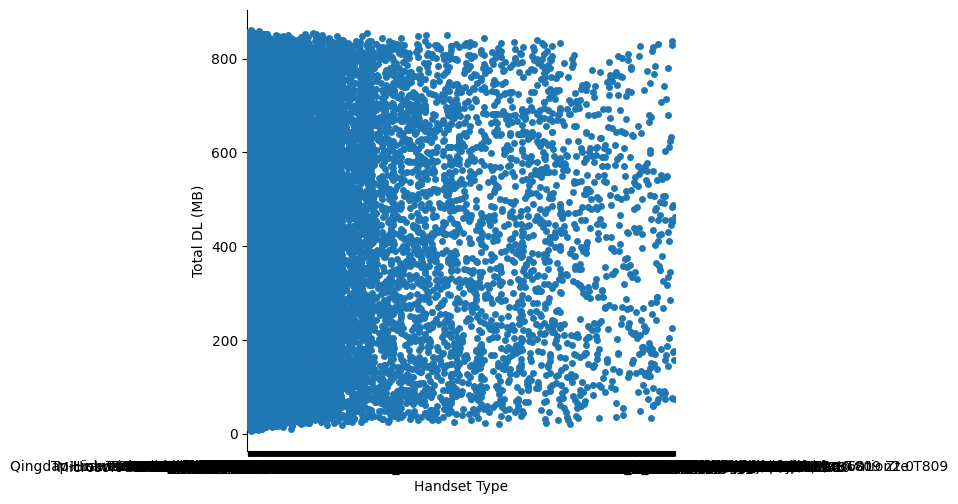

In [20]:
sns.catplot(data = df, x=df["Handset Type"], y =df["Total DL (MB)"])
plt.show()

#### Handling missing values

In [96]:
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [97]:
# How many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing (df):
    # calculate total number of cells in dataframe
    totalCells = np.prod(df.shape)

    # count the number of missing values per column
    missingCount = df.isnull().sum()

    # Calcualte total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    missingPercentage = round(((totalMissing/totalCells)*100), 2)
    #print(f"The Telecom database contains {missingPercentage}% missing values")
    return missingPercentage

print(f"The Telecom database contains {percent_missing (df)}% missing values")

The Telecom database contains 11.86% missing values


#### Let's work on the missing values by evaluating the percentage of each feature. After that, order them. Finally, remove the ones above `12%`

In [98]:
# converting the columns of our data into a list.
missing = []
col = df.columns.tolist()
# add corresponding feature and missing value percentage into missing[]
for i in col:
    missing.append((i, percent_missing(df[i])))
    
missing_percent = pd.DataFrame(missing, columns = ['Features', 'MissingPercentage'])
missing_sorted = missing_percent.sort_values(by='MissingPercentage', ascending=False)
missing_sorted.head(15)

,Features,MissingPercentage
34,Nb of sec with 37500B < Vol UL,86.84
36,Nb of sec with 6250B < Vol UL < 37500B,74.56
31,Nb of sec with 125000B < Vol DL,65.02
15,TCP UL Retrans. Vol (Bytes),64.43
33,Nb of sec with 31250B < Vol DL < 125000B,62.39
32,Nb of sec with 1250B < Vol UL < 6250B,61.93
35,Nb of sec with 6250B < Vol DL < 31250B,58.88
14,TCP DL Retrans. Vol (Bytes),58.76
25,HTTP UL (Bytes),54.54
24,HTTP DL (Bytes),54.32


In [99]:
# keep columns with a missing percentage less or equal to 12%
useful_columns = missing_sorted[missing_sorted['MissingPercentage']<12]['Features'].tolist()
df = df[useful_columns]
df

,Last Location Name,MSISDN/Number,Bearer Id,Nb of sec with Vol UL < 1250B,UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),DL TP < 50 Kbps (%),Nb of sec with Vol DL < 6250B,...,Social Media DL (Bytes),Start ms,End,End ms,Dur. (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Activity Duration DL (ms),Start,Total DL (MB)
0,9.16456699548519E+015,3.366496e+10,1.311448e+19,214.0,100.0,0.0,0.0,0.0,100.0,213.0,...,1.545765e+06,770.0,4/25/2019 14:35,662.0,1823652.0,23.0,44.0,37624.0,4/4/2019 12:01,294.570576
1,L77566A,3.368185e+10,1.311448e+19,1022.0,100.0,0.0,0.0,0.0,100.0,971.0,...,1.926113e+06,235.0,4/25/2019 8:15,606.0,1365104.0,16.0,26.0,168.0,4/9/2019 13:04,623.116460
2,D42335A,3.376063e+10,1.311448e+19,695.0,100.0,0.0,0.0,0.0,100.0,751.0,...,1.684053e+06,1.0,4/25/2019 11:58,652.0,1361762.0,6.0,9.0,0.0,4/9/2019 17:42,266.845069
3,T21824A,3.375034e+10,1.311448e+19,207.0,100.0,0.0,0.0,0.0,100.0,17.0,...,6.441210e+05,486.0,4/25/2019 7:36,171.0,1321509.0,44.0,44.0,3330.0,4/10/2019 0:31,806.835680
4,D88865A,3.369980e+10,1.311448e+19,604.0,100.0,0.0,0.0,0.0,100.0,607.0,...,8.626000e+05,565.0,4/25/2019 10:40,954.0,1089009.0,6.0,9.0,0.0,4/12/2019 20:10,542.772855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,D20434A,3.365069e+10,7.277826e+18,229.0,100.0,0.0,0.0,0.0,100.0,223.0,...,3.464974e+06,451.0,4/30/2019 6:02,214.0,81230.0,52.0,65.0,42376.0,4/29/2019 7:28,547.576198
149997,D10223C,3.366345e+10,7.349883e+18,102.0,100.0,0.0,0.0,0.0,100.0,105.0,...,2.344568e+06,483.0,4/30/2019 10:41,187.0,97970.0,23.0,54.0,17264.0,4/29/2019 7:28,635.765881
149998,T51102A,3.362189e+10,1.311448e+19,108.0,100.0,0.0,0.0,0.0,100.0,104.0,...,1.245845e+06,283.0,4/30/2019 10:46,810.0,98249.0,43.0,47.0,25003.0,4/29/2019 7:28,565.325170
149999,L88342B,3.361962e+10,1.311448e+19,82.0,100.0,0.0,0.0,0.0,100.0,43.0,...,8.015470e+05,696.0,4/30/2019 10:40,327.0,97910.0,34.0,37.0,13405.0,4/29/2019 7:28,354.667587


In [100]:
df.isnull().sum()

Last Location Name                1153
MSISDN/Number                     1066
Bearer Id                          991
Nb of sec with Vol UL < 1250B      793
UL TP < 10 Kbps (%)                792
10 Kbps < UL TP < 50 Kbps (%)      792
50 Kbps < UL TP < 300 Kbps (%)     792
UL TP > 300 Kbps (%)               792
DL TP < 50 Kbps (%)                754
Nb of sec with Vol DL < 6250B      755
250 Kbps < DL TP < 1 Mbps (%)      754
DL TP > 1 Mbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)     754
Handset Type                       572
Handset Manufacturer               572
IMEI                               572
IMSI                               570
Activity Duration UL (ms)            1
Email UL (Bytes)                     0
Total UL (MB)                        1
Dur. (s)                             1
Total DL (Bytes)                     1
Total UL (Bytes)                     1
Other UL (Bytes)                     0
Other DL (Bytes)                     0
Gaming UL (Bytes)        

#### Drop the remaining missing values from our data

In [102]:
df = df.dropna()
df.isnull().sum()

Last Location Name                0
MSISDN/Number                     0
Bearer Id                         0
Nb of sec with Vol UL < 1250B     0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
DL TP < 50 Kbps (%)               0
Nb of sec with Vol DL < 6250B     0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
50 Kbps < DL TP < 250 Kbps (%)    0
Handset Type                      0
Handset Manufacturer              0
IMEI                              0
IMSI                              0
Activity Duration UL (ms)         0
Email UL (Bytes)                  0
Total UL (MB)                     0
Dur. (s)                          0
Total DL (Bytes)                  0
Total UL (Bytes)                  0
Other UL (Bytes)                  0
Other DL (Bytes)                  0
Gaming UL (Bytes)                 0
Gaming DL (Bytes)                 0
Netflix UL (Bytes)          

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146891 entries, 0 to 149999
Data columns (total 46 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Last Location Name              146891 non-null  object 
 1   MSISDN/Number                   146891 non-null  float64
 2   Bearer Id                       146891 non-null  float64
 3   Nb of sec with Vol UL < 1250B   146891 non-null  float64
 4   UL TP < 10 Kbps (%)             146891 non-null  float64
 5   10 Kbps < UL TP < 50 Kbps (%)   146891 non-null  float64
 6   50 Kbps < UL TP < 300 Kbps (%)  146891 non-null  float64
 7   UL TP > 300 Kbps (%)            146891 non-null  float64
 8   DL TP < 50 Kbps (%)             146891 non-null  float64
 9   Nb of sec with Vol DL < 6250B   146891 non-null  float64
 10  250 Kbps < DL TP < 1 Mbps (%)   146891 non-null  float64
 11  DL TP > 1 Mbps (%)              146891 non-null  float64
 12  50 Kbps < DL TP < 250

#### Let's keep the numerical variables

In [116]:
df_num = df.select_dtypes(exclude='object')
df_num.head()

,MSISDN/Number,Bearer Id,Nb of sec with Vol UL < 1250B,UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),DL TP < 50 Kbps (%),Nb of sec with Vol DL < 6250B,250 Kbps < DL TP < 1 Mbps (%),...,Google DL (Bytes),Social Media UL (Bytes),Social Media DL (Bytes),Start ms,End ms,Dur. (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Activity Duration DL (ms),Total DL (MB)
0,3.366496e+10,1.311448e+19,214.0,100.0,0.0,0.0,0.0,100.0,213.0,0.0,...,1634479.0,24420.0,1545765.0,770.0,662.0,1823652.0,23.0,44.0,37624.0,294.570576
1,3.368185e+10,1.311448e+19,1022.0,100.0,0.0,0.0,0.0,100.0,971.0,0.0,...,3493924.0,7165.0,1926113.0,235.0,606.0,1365104.0,16.0,26.0,168.0,623.116460
2,3.376063e+10,1.311448e+19,695.0,100.0,0.0,0.0,0.0,100.0,751.0,0.0,...,8535055.0,42224.0,1684053.0,1.0,652.0,1361762.0,6.0,9.0,0.0,266.845069
3,3.375034e+10,1.311448e+19,207.0,100.0,0.0,0.0,0.0,100.0,17.0,0.0,...,9023734.0,13372.0,644121.0,486.0,171.0,1321509.0,44.0,44.0,3330.0,806.835680
4,3.369980e+10,1.311448e+19,604.0,100.0,0.0,0.0,0.0,100.0,607.0,0.0,...,6248284.0,50188.0,862600.0,565.0,954.0,1089009.0,6.0,9.0,0.0,542.772855


#### Dimension Reduction
Before keep the important features, let's scale our features.

After, we will use Principal Component Analysis for the dimension reduction.